#**PRUEBA UNITARIA MODELO: Máquinas de Soporte Vectorial SVM**

In [ ]:
# Importar las librerias
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar el archivo csv desde drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/Clima_sin_Presion.csv"
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Codificar columnas categoricas
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Definir atributos y clase
X = df.drop("Condition", axis=1)
y = df["Condition"]
print(label_encoders["Condition"].classes_)

['Cloudy' 'Considerably Cloudy' 'Fair' 'Fog' 'Haze' 'Heavy Rain'
 'Heavy T-Storm' 'Mist' 'Rain' 'Thunder']


In [ ]:
# Division en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
# Crear y entrenar el modelo
svm = SVC(kernel='poly', probability=True, C=10)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

In [ ]:
# svm = SVC(kernel='poly', probability=True, C=10). ACCURACY= 36%
# svm = SVC(kernel='poly', probability=True, C=10). ACCURACY= 46%
# svm = SVC(kernel='sigmoid', probability=True, C=10), ACCURACY= 14%

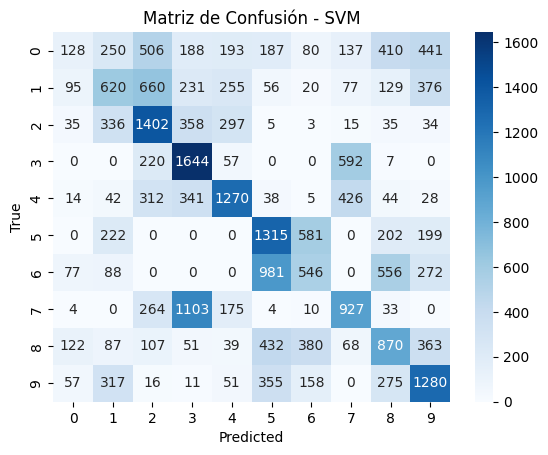

Accuracy: 0.39695201809739256

Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.05      0.08      2520
           1       0.32      0.25      0.28      2519
           2       0.40      0.56      0.47      2520
           3       0.42      0.65      0.51      2520
           4       0.54      0.50      0.52      2520
           5       0.39      0.52      0.45      2519
           6       0.31      0.22      0.25      2520
           7       0.41      0.37      0.39      2520
           8       0.34      0.35      0.34      2519
           9       0.43      0.51      0.46      2520

    accuracy                           0.40     25197
   macro avg       0.38      0.40      0.38     25197
weighted avg       0.38      0.40      0.38     25197



In [ ]:
# Mostrar resultados
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de Confusión - SVM")
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))